In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import os

In [2]:
os.listdir(r"C:\Users\bhava\Downloads\Datasets\uber")

['other-American_B01362.csv',
 'other-Carmel_B00256.csv',
 'other-Dial7_B00887.csv',
 'other-Diplo_B01196.csv',
 'other-Federal_02216.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Highclass_B01717.csv',
 'other-Lyft_B02510.csv',
 'other-Prestige_B01338.csv',
 'other-Skyline_B00111.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [3]:
uber_15=pd.read_csv(r"C:\Users\bhava\Downloads\Datasets\uber\uber-raw-data-janjune-15_sample.csv")

In [4]:
uber_15

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-02 21:43:00,B02764,237
1,B02682,2015-01-20 19:52:59,B02682,231
2,B02617,2015-03-19 20:26:00,B02617,161
3,B02764,2015-04-10 17:38:00,B02764,107
4,B02764,2015-03-23 07:03:00,B00111,140
...,...,...,...,...
99995,B02764,2015-04-13 16:12:00,B02764,234
99996,B02764,2015-03-06 21:32:00,B02764,24
99997,B02598,2015-03-19 19:56:00,B02598,17
99998,B02682,2015-05-02 16:02:00,B02682,68


Find duplicates

In [5]:
uber_15.duplicated().sum()

54

In [6]:
uber_15.drop_duplicates(inplace=True)

In [7]:
uber_15.shape

(99946, 4)

Handling missing values

In [8]:
uber_15.isnull().sum()

Dispatching_base_num       0
Pickup_date                0
Affiliated_base_num     1116
locationID                 0
dtype: int64

In [9]:
uber_15['Pickup_date']=pd.to_datetime(uber_15['Pickup_date'])

Which month has maximum number of uber pickups

In [10]:
uber_15['month']=uber_15['Pickup_date'].dt.month_name()

<AxesSubplot:>

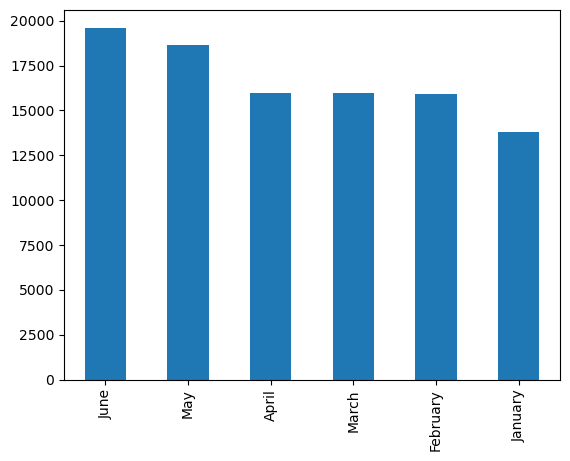

In [11]:
uber_15['month'].value_counts().plot(kind="bar")

In [12]:
uber_15['weekday']=uber_15['Pickup_date'].dt.day_name()
uber_15['day']=uber_15['Pickup_date'].dt.day
uber_15['hour']=uber_15['Pickup_date'].dt.hour
uber_15['minute']=uber_15['Pickup_date'].dt.minute


In [13]:
uber_15.head(4)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekday,day,hour,minute
0,B02617,2015-05-02 21:43:00,B02764,237,May,Saturday,2,21,43
1,B02682,2015-01-20 19:52:59,B02682,231,January,Tuesday,20,19,52
2,B02617,2015-03-19 20:26:00,B02617,161,March,Thursday,19,20,26
3,B02764,2015-04-10 17:38:00,B02764,107,April,Friday,10,17,38


Uber pickups as per day monthly wise

In [14]:
pivot=pd.crosstab(index=uber_15['month'],columns=uber_15['weekday'])

<AxesSubplot:xlabel='month'>

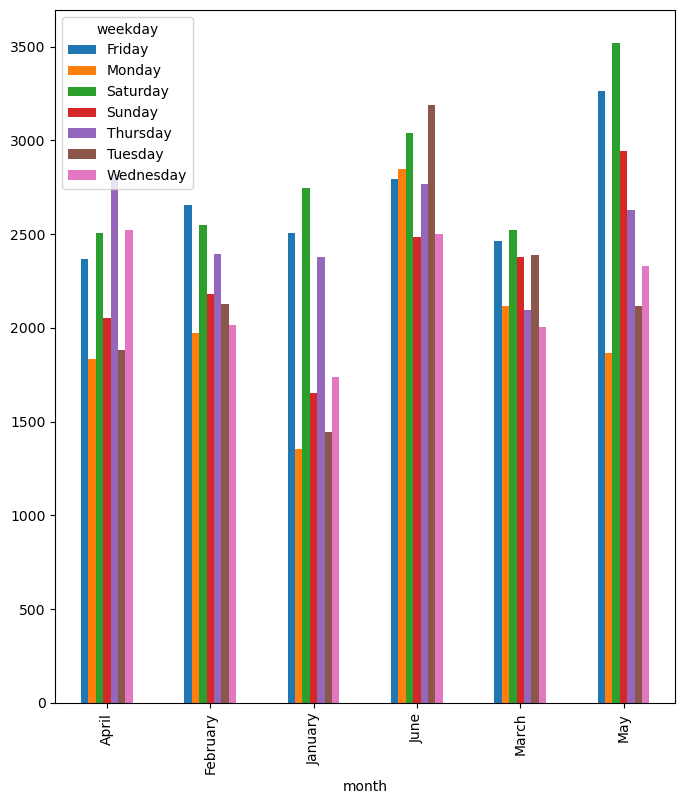

In [15]:
pivot.plot(kind="bar",figsize=(8,9))

Hourly rush in New York city

In [16]:
summary=uber_15.groupby(['weekday','hour'],as_index=False).size()

In [17]:
summary

,weekday,hour,size
0,Friday,0,581
1,Friday,1,333
2,Friday,2,197
3,Friday,3,138
4,Friday,4,161
...,...,...,...
163,Wednesday,19,1044
164,Wednesday,20,897
165,Wednesday,21,949
166,Wednesday,22,900


<AxesSubplot:xlabel='hour', ylabel='size'>

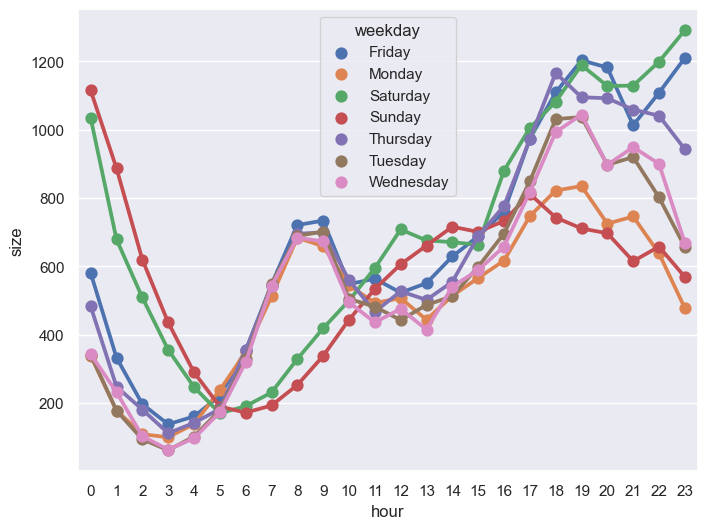

In [18]:
sns.set(rc={"figure.figsize":(8, 6)})
sns.pointplot(x="hour",y="size",hue="weekday",data=summary)

Which Base number have most number of active vehicle

In [19]:
uber_foil=pd.read_csv(r"C:\Users\bhava\Downloads\Datasets\uber\Uber-Jan-Feb-FOIL.csv")

In [20]:
uber_foil.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [21]:
!pip install chart_studio
!pip install plotly

In [22]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode,plot, iplot

In [23]:
init_notebook_mode(connected=True)

In [24]:
uber_foil.columns

Index(['dispatching_base_number', 'date', 'active_vehicles', 'trips'], dtype='object')

In [25]:
px.box(x="dispatching_base_number",y="active_vehicles",data_frame=uber_foil)

In [26]:
px.violin(x="dispatching_base_number",y="active_vehicles",data_frame=uber_foil)

Complete Data Collection

In [27]:
files=os.listdir(r"C:\Users\bhava\Downloads\Datasets\uber")[-8:]


In [28]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [29]:
files.remove("uber-raw-data-janjune-15.csv")

In [30]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [31]:
finaldf=pd.DataFrame()
path=r"C:\Users\bhava\Downloads\Datasets\uber"
for file in files:
    currdf=pd.read_csv(path+'/'+file)
    finaldf=pd.concat([currdf,finaldf])

In [32]:
finaldf.shape

(4634327, 8)

In [33]:
finaldf.duplicated().sum()

82635

In [34]:
finaldf.drop_duplicates(inplace=True)

In [35]:
finaldf.shape

(4551692, 8)

In [36]:
finaldf

,Date/Time,Lat,Lon,Base,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512,NaN,NaN,NaN,NaN
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512,NaN,NaN,NaN,NaN
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512,NaN,NaN,NaN,NaN
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512,NaN,NaN,NaN,NaN
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764,NaN,NaN,NaN,NaN
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764,NaN,NaN,NaN,NaN
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764,NaN,NaN,NaN,NaN
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764,NaN,NaN,NaN,NaN


In [37]:
rush=finaldf.groupby(['Lat','Lon'],as_index=False).size()

In [38]:
rush

,Lat,Lon,size
0,39.6569,-74.2258,1
1,39.6686,-74.1607,1
2,39.7214,-74.2446,1
3,39.8416,-74.1512,1
4,39.9055,-74.0791,1
...,...,...,...
574553,41.3730,-72.9237,1
574554,41.3737,-73.7988,1
574555,41.5016,-72.8987,1
574556,41.5276,-72.7734,1


In [39]:
!pip install folium

In [40]:
import folium
from folium.plugins import HeatMap

In [41]:
basemap=folium.Map()

In [42]:
basemap

In [43]:
HeatMap(rush).add_to(basemap)

Pairwise Analysis to figure out Rush

In [44]:
finaldf.head()

,Date/Time,Lat,Lon,Base,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512,NaN,NaN,NaN,NaN
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512,NaN,NaN,NaN,NaN
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512,NaN,NaN,NaN,NaN
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512,NaN,NaN,NaN,NaN
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512,NaN,NaN,NaN,NaN


In [45]:
finaldf.dtypes

Date/Time                object
Lat                     float64
Lon                     float64
Base                     object
Dispatching_base_num     object
Pickup_date              object
Affiliated_base_num      object
locationID              float64
dtype: object

In [46]:
finaldf['Date/Time']=pd.to_datetime(finaldf['Date/Time'], format="%m/%d/%Y %H:%M:%S")

In [47]:
finaldf['day']=finaldf['Date/Time'].dt.day
finaldf['hour']=finaldf['Date/Time'].dt.hour

In [48]:
finaldf.head()

,Date/Time,Lat,Lon,Base,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,day,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,NaN,NaN,NaN,NaN,1.0,0.0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,NaN,NaN,NaN,NaN,1.0,0.0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,NaN,NaN,NaN,NaN,1.0,0.0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,NaN,NaN,NaN,NaN,1.0,0.0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,NaN,NaN,NaN,NaN,1.0,0.0


In [49]:
pivot=finaldf.groupby(['day','hour']).size().unstack()

In [50]:
pivot.style.background_gradient()

hour,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000,21.000000,22.000000,23.000000
day,,,,,,,,,,,,,,,,,,,,,,,,
1.000000,3178,1944,1256,1308,1429,2126,3664,5380,5292,4617,4607,4729,4930,5794,6933,7910,8633,9511,8604,8001,7315,7803,6268,4050
2.000000,2435,1569,1087,1414,1876,2812,4920,6544,6310,4712,4797,4975,5188,5695,6904,8449,10109,11100,11123,9474,8759,8357,6998,5160
3.000000,3354,2142,1407,1467,1550,2387,4241,5663,5386,4657,4788,5065,5384,6093,7226,8850,10314,10491,11239,9599,9026,8531,7142,4686
4.000000,2897,1688,1199,1424,1696,2581,4592,6029,5704,4744,4743,4975,5193,6175,7158,8515,9492,10357,10259,9097,8358,8649,7706,5130
5.000000,2733,1541,1030,1253,1617,2900,4814,6261,6469,5530,5141,5011,5047,5690,6955,8312,9609,10699,10170,9430,9354,9610,8853,6518
6.000000,4537,2864,1864,1555,1551,2162,3642,4766,4942,4401,4801,5174,5426,6258,7235,8612,9444,9929,9263,8405,8117,8567,7852,5946
7.000000,3645,2296,1507,1597,1763,2422,4102,5575,5376,4639,4905,5166,5364,6214,7276,8474,10393,11013,10573,9472,8691,8525,7194,4801
8.000000,2830,1646,1123,1483,1889,3224,5431,7361,7357,5703,5288,5350,5483,6318,7240,8775,9851,10673,9687,8796,8604,8367,6795,4256
9.000000,2657,1724,1222,1480,1871,3168,5802,7592,7519,5895,5406,5443,5496,6419,7877,9220,10270,11910,11449,9804,8909,8665,7499,5203
